In [1]:
import face_alignment
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torch
import time

#fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, flip_input=False, device='cpu')
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, device='cpu', face_detector='blazeface')

In [2]:
cap = cv2.VideoCapture('/home/miranjo/IntuitDetect/data/fake/a_numbers_fake.mp4')
frames = []
while True:
    success, frame = cap.read()
    if not success:
        break
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #frame = cv2.resize(frame, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)

    frames.append(frame)

BlazeFace: Execution time for a single image: 6.0943803787231445


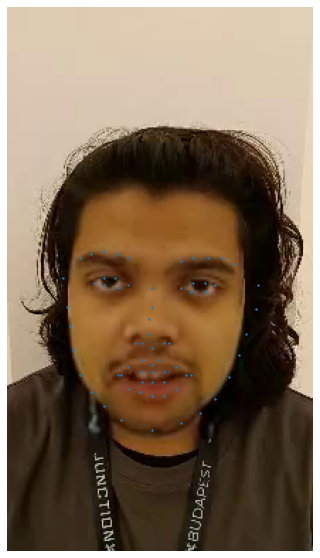

In [3]:
t_start = time.time()
preds = fa.get_landmarks_from_image(frames[0])
print(f'BlazeFace: Execution time for a single image: {time.time() - t_start}')

plt.figure(figsize=(10,10))
plt.imshow(frames[0])
plt.axis('off')

for detection in preds:
    plt.scatter(detection[:,0], detection[:,1], 2)

In [30]:
detection

array([[ 39., 191.],
       [ 42., 211.],
       [ 44., 225.],
       [ 46., 242.],
       [ 51., 259.],
       [ 59., 271.],
       [ 68., 281.],
       [ 80., 291.],
       [102., 298.],
       [122., 293.],
       [136., 286.],
       [146., 276.],
       [156., 261.],
       [163., 245.],
       [168., 230.],
       [175., 213.],
       [177., 196.],
       [ 51., 177.],
       [ 59., 174.],
       [ 68., 172.],
       [ 78., 174.],
       [ 85., 177.],
       [122., 179.],
       [131., 177.],
       [141., 177.],
       [151., 177.],
       [160., 181.],
       [102., 198.],
       [102., 211.],
       [100., 220.],
       [100., 230.],
       [ 90., 237.],
       [ 95., 237.],
       [102., 240.],
       [110., 237.],
       [114., 237.],
       [ 61., 194.],
       [ 68., 191.],
       [ 76., 191.],
       [ 85., 196.],
       [ 78., 198.],
       [ 68., 196.],
       [122., 198.],
       [131., 194.],
       [139., 194.],
       [146., 196.],
       [139., 201.],
       [129.,

In [16]:
batch = np.stack(frames[:16])
batch = torch.Tensor(batch.transpose(0, 3, 1, 2))
t_start = time.time()
preds = fa.get_landmarks_from_batch(batch)
print(f'BlazeFace: Execution time for a batch of 16 images: {time.time() - t_start}')

BlazeFace: Execution time for a batch of 16 images: 3.9894940853118896


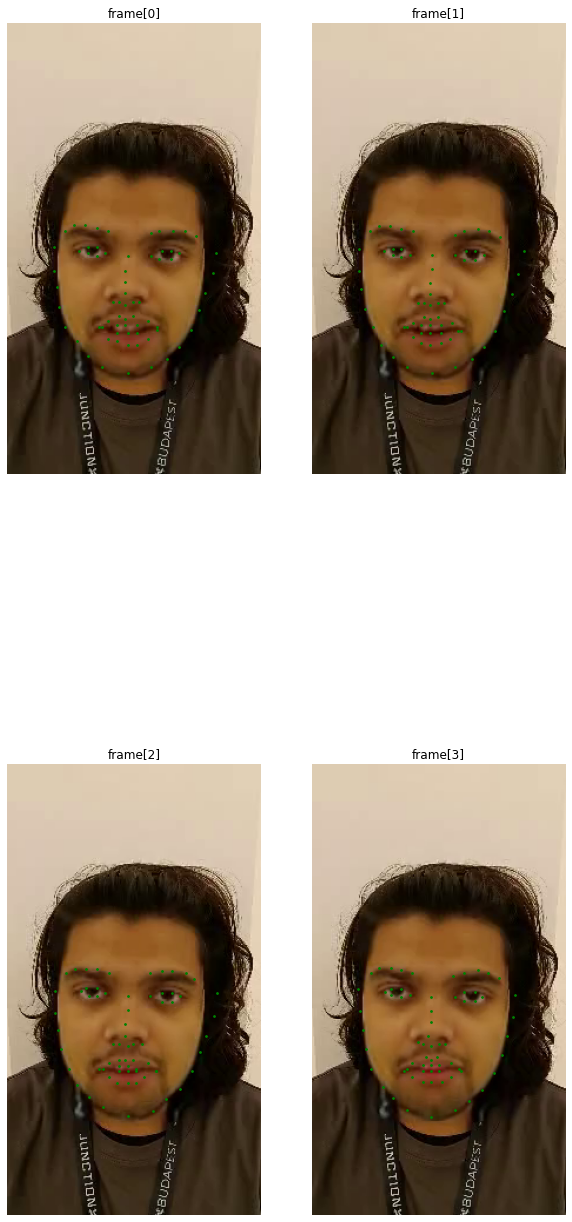

In [17]:
fig = plt.figure(figsize=(10, 25))
for i, pred in enumerate(preds[:4]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(frames[i])
    plt.title(f'frame[{i}]')
    plt.axis('off')
    for detection in pred:
            plt.scatter(detection[0], detection[1], color="g", s=3)

In [21]:
cap = cv2.VideoCapture('data/fake/a_numbers_fake.mp4')
frames = []
while True:
    success, frame = cap.read()
    if not success:
        break
    
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #frame = cv2.resize(frame, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)

    frames.append(frame)

In [22]:
# Initialize VideoWriter parameters
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

fps = 30  # Change the frames per second as needed

output_file = 'results/a_numbers_fake_track.mp4'
frame_width, frame_height = frames[0].shape[1], frames[0].shape[0]

# Create VideoWriter object
out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

# Process frames in batches and write to the video
batch_size = 16
num_frames = len(frames)

for i in range(0, num_frames, batch_size):
    batch_frames = frames[i:i+batch_size]
    
    # Convert frames to the required format (assuming frames are in BGR format)
    batch = np.stack(batch_frames)
    batch = torch.Tensor(batch.transpose(0, 3, 1, 2))
    
    # Processing using your model (fa) - Replace this with your actual processing logic
    t_start = time.time()
    preds = fa.get_landmarks_from_batch(batch)
    print(f'BlazeFace: Execution time for batch {i+1}-{min(i+batch_size, num_frames)}: {time.time() - t_start}')
    
    # Visualize results and write to video
    for j, pred in enumerate(preds):
        frame_index = i + j
        if frame_index < num_frames:
            frame = frames[frame_index]
            
            # Plot landmarks on the frame
            for detection in pred:
                cv2.circle(frame, (int(detection[0]), int(detection[1])), 2, (0, 255, 0), -1)  # Draw a green circle
            
            # Write the frame with landmarks to the video
            out.write(frame)

# Release the VideoWriter and close the output file
out.release()


BlazeFace: Execution time for batch 1-16: 4.444000959396362
BlazeFace: Execution time for batch 17-32: 4.361926555633545
BlazeFace: Execution time for batch 33-48: 4.029724359512329
BlazeFace: Execution time for batch 49-64: 3.9641172885894775
BlazeFace: Execution time for batch 65-78: 3.4102394580841064
